# D

$x^2+(\frac{3}{2}y-\sqrt{|x|})^2=3$

because the figure is symmetric, therefore for x>0

$y = \frac{2}{3}(+-\sqrt{3-x^2}+\sqrt x)$

$N = 10,40,160$

to be convenient, I make knots exactly the characteristic points, and I choose boundary condition to be D1 on point $x = 1e-3$

because the figure just need dy/dx to be accurate, boundary condition D1 includes dx/dt and dy/dt, so I can make dx/dt arbitrary as long as $\frac{dy/dt}{dx/dt}$ remains the same

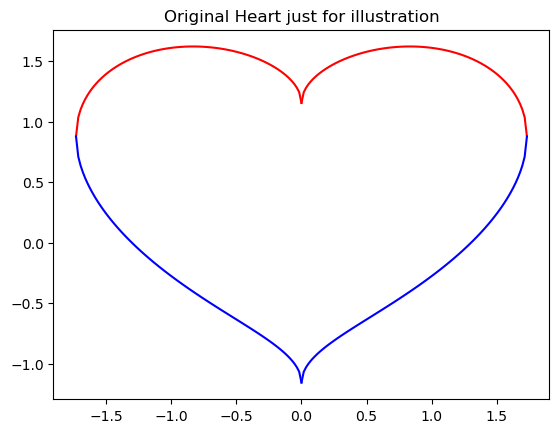

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def upper_heart_y(x):
    return 2/3*(np.sqrt(3-x**2)+np.sqrt(x))

def upper_heart_dy(x):
    return 2/3*(-x/np.sqrt(3-x**2)+1/(2*np.sqrt(x)))

def lower_heart_y(x):
    return 2/3*(-np.sqrt(3-x**2)+np.sqrt(x))

def lower_heart_dy(x):
    return 2/3*(x/np.sqrt(3-x**2)+1/(2*np.sqrt(x)))

# original heart
x = np.linspace(0, np.sqrt(3), 100)
y = upper_heart_y(x)

plt.plot(x, y, 'r')
plt.plot(-x, y, 'r')

y = lower_heart_y(x)

plt.plot(x, y, 'b')
plt.plot(-x, y, 'b')
plt.title('Original Heart just for illustration')
plt.show()


[0.         0.01619764 0.02512443 0.03249564 0.03909374]


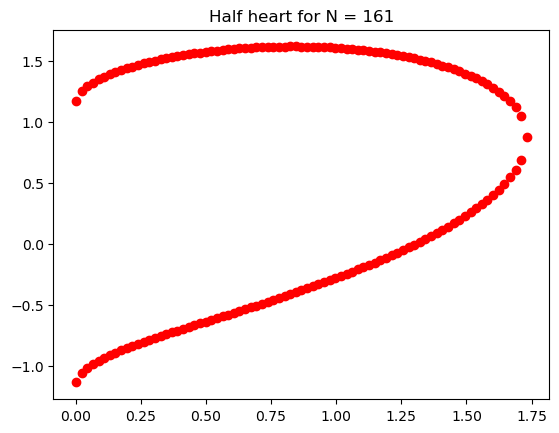

In [19]:
# half heart, knots are exactly characteristic points
# always select 1e-3 and sqrt(3)
# then select n points between 1e-3 and sqrt(3), for both upper heart and lower heart
N = [10,40,160]
for i in range(len(N)):
    # number of points != 0 and != sqrt(3)
    n = N[i]
    n = int(np.ceil((n-3)/2))
    N[i] = 2*n+3
    x = np.zeros(N[i])
    y = np.zeros(N[i])
    t = np.zeros(N[i])
    a = 1e-3
    b = np.sqrt(3)

    x[0:n+2] = np.linspace(a, b, n+2)
    y[0:n+2] = upper_heart_y(x[0:n+2])
    x[n+1:2*n+3] = np.linspace(b, a, n+2)
    y[n+1:2*n+3] = lower_heart_y(x[n+1:2*n+3])
    for j in range(1,N[i]):
        t[j] = t[j-1]+np.sqrt((x[j]-x[j-1])**2+(y[j]-y[j-1])**2)
    for j in range(N[i]):
        t[j] = t[j]/t[-1]

    # save data for x spline
    txt = open("output/heart_x_"+str(N[i])+".txt", "w")
    txt.write(str(N[i])+"\n")
    for j in range(N[i]):
        txt.write(str(t[j])+" "+str(x[j])+"\n")
    txt.write("\n")
    txt.write(str(1)+" "+str(1))
    txt.close()

    # save data for y spline
    txt = open("output/heart_y_"+str(N[i])+".txt", "w")
    txt.write(str(N[i])+"\n")
    for j in range(N[i]):
        txt.write(str(t[j])+" "+str(y[j])+"\n")
    txt.write("\n")
    txt.write(str(upper_heart_dy(x[0]))+" "+str(lower_heart_dy(x[-1])))
    txt.close()

plt.scatter(x, y, c='r')
plt.title("Half heart for N = "+str(N[i]))
print(t[0:5])

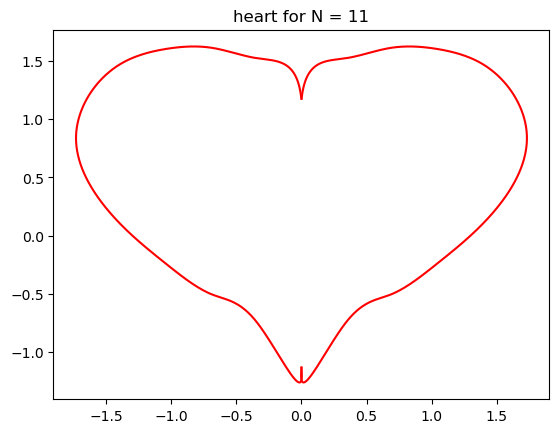

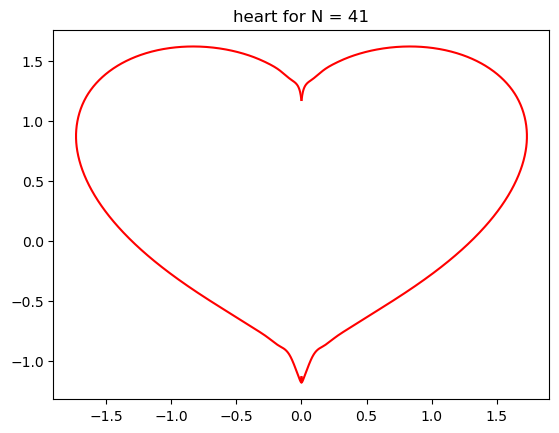

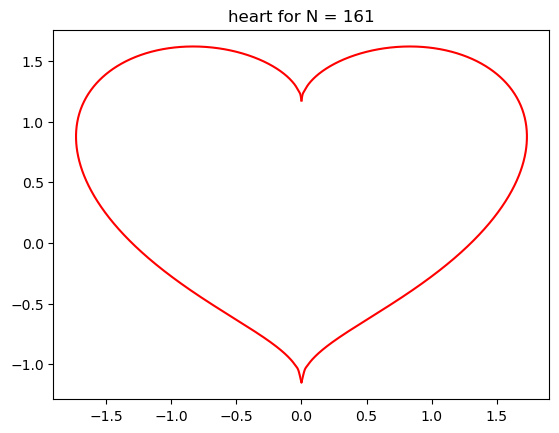

In [22]:
# plot the evals
N = [11,41,161]
for i in range(len(N)):
    txt = open("output/heart_x_evals_"+str(N[i])+".txt", "r")
    n = int(txt.readline())
    t = np.zeros(n)
    x = np.zeros(n)
    for j in range(n):
        line = txt.readline().split()
        t[j] = float(line[0])
        x[j] = float(line[1])
    txt.close()

    txt = open("output/heart_y_evals_"+str(N[i])+".txt", "r")
    n = int(txt.readline())
    t = np.zeros(n)
    y = np.zeros(n)
    for j in range(n):
        line = txt.readline().split()
        t[j] = float(line[0])
        y[j] = float(line[1])
    txt.close()

    plt.figure(i+1)
    plt.plot(x, y, c='r')
    plt.plot(-x, y, c='r')
    plt.title("heart for N = "+str(N[i]))
    plt.show()